In [ ]:
### installing np_utils library
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=0db5d9c9bb1e818ccd89a6715637d62d649d40535c9f75553a3cfd936549f831
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
## importing integral libraries
import numpy as np
# libraries to display dataframe and images
from IPython.display import display,HTML
from PIL import Image
# matplotlib for vizualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# inbuild library to work with textual data
import string
# Setting up the NLTK to pre-processing textual data
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')
nltk.download('treebank')

sns.set_theme(style="darkgrid")
pd.set_option("display.max_columns", 100)
%matplotlib inline
import pip
## import spacy libraries
import spacy
from spacy import displacy
# importing kera libraries
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer,  text_to_word_sequence
from keras import initializers as initializers, regularizers, constraints
from keras.layers import Dense, Dropout, Activation, Flatten, Input,Layer
from keras.layers import Convolution2D, MaxPooling2D, Embedding, Dropout, LSTM, GRU, Bidirectional, TimeDistributed
from keras.models import Sequential, Model, load_model
from keras import backend as K
from tensorflow.keras.utils import to_categorical,plot_model

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [ ]:
#creating a directory
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#using credentials to open kaggle dataset
import json
token = {"username":"your_user_name","key":"your_key"}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /root/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
#downloading the zipped dataset folder on cloud
!kaggle datasets download -d maxscheijen/dutch-news-articles

cp: '/root/.kaggle/kaggle.json' and '/root/.kaggle/kaggle.json' are the same file
- path is now set to: {/content}
dutch-news-articles.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/{/content}/datasets/maxscheijen/dutch-news-articles/dutch-news-articles.zip

Archive:  /content/{/content}/datasets/maxscheijen/dutch-news-articles/dutch-news-articles.zip
replace dutch-news-articles.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dutch-news-articles.csv  


In [ ]:
df=pd.read_csv('dutch-news-articles.csv')
df.head()

,datetime,title,content,category,url
0,2010-01-01 00:49:00,Enige Litouwse kerncentrale dicht,De enige kerncentrale van Litouwen is oudjaars...,Buitenland,https://nos.nl/artikel/126231-enige-litouwse-k...
1,2010-01-01 02:08:00,Spanje eerste EU-voorzitter onder nieuw verdrag,Spanje is met ingang van vandaag voorzitter va...,Buitenland,https://nos.nl/artikel/126230-spanje-eerste-eu...
2,2010-01-01 02:09:00,Fout justitie in Blackwater-zaak,Vijf werknemers van het omstreden Amerikaanse ...,Buitenland,https://nos.nl/artikel/126233-fout-justitie-in...
3,2010-01-01 05:14:00,"Museumplein vol, minder druk in Rotterdam",Het Oud en Nieuwfeest op het Museumplein in Am...,Binnenland,https://nos.nl/artikel/126232-museumplein-vol-...
4,2010-01-01 05:30:00,Obama krijgt rapporten over aanslag,President Obama heeft de eerste rapporten gekr...,Buitenland,https://nos.nl/artikel/126236-obama-krijgt-rap...


In [ ]:
len(df)

255524

In [ ]:
## replacing Cultuur-En-Media with Cultuur & Media category
df['category'].replace({"Cultuur-En-Media":"Cultuur & Media"},inplace=True)

In [ ]:
### observing topic distribution
a=df[df['datetime']>='2022-01-01']
a['category'].value_counts()

Buitenland              7525
Binnenland              6281
Economie                1672
Politiek                1433
Regionaal nieuws        1029
Cultuur & Media          496
Omroep Brabant           220
Nh Nieuws                211
Omroep West              130
Rijnmond                 125
Omroep Gelderland        115
Regionaal Nieuws          97
Rtv Noord                 94
L1Mburg                   89
Rtv Oost                  89
Rtv Utrecht               85
Omroep Zeeland            76
Omrop Fryslân             72
Regio                     68
Tech                      64
Omroep Flevoland          62
Aardbevingen              56
Koningshuis               51
Opmerkelijk               50
Rtv Drenthe               48
Verkiezingen              44
Strijd In Sudan           42
Op Weg Naar Tk2023        35
Klimaat                   31
Einde Rutte Iv            25
Slavernijverleden         24
Stikstofcrisis            20
Gronings Gas              20
1 Jaar Oorlog             18
Turkije Kiest 

In [ ]:
a['category'].unique()

array(['Binnenland', 'Cultuur & Media', 'Economie', 'Buitenland',
       'Regionaal nieuws', 'Koningshuis', 'Politiek', 'Opmerkelijk',
       'Tech', 'Regio', 'Omrop Fryslân', 'Omroep Flevoland',
       'Omroep Brabant', 'L1Mburg', 'Stikstofcrisis', 'Omroep Gelderland',
       'Rijnmond', 'Nh Nieuws', 'Midterm-Verkiezingen', 'Rtv Utrecht',
       'Slavernijverleden', 'Rtv Oost', 'Rtv Drenthe', 'Rtv Noord',
       'Regionaal Nieuws', 'Omroep West', 'Omroep Zeeland', 'Klimaat',
       'Jaarwisseling', 'Pelé Overleden', 'Watersnoodramp',
       'Schipholonderzoek', 'Kroning Charles', 'Verkiezingen',
       'Aardbevingen', '1 Jaar Oorlog', 'Gronings Gas', 'Treinongeluk',
       'Pentagon-Lek', 'Strijd In Sudan', 'Proces-Taghi', 'Songfestival ',
       '4 En 5 Mei ', 'Turkije Kiest', 'Wangedrag Supporters',
       'Grensoverschrijdend ', 'Oekraïens Offensief', 'Opstand Wagner',
       'Woningcorporaties', 'Keti Koti', 'Crisis Asielbeleid',
       'Einde Rutte Iv', 'Op Weg Naar Tk2023', 'Wk 

In [ ]:
### consideringtop 9 topics along with the 10th category as Others
df['upd_category']=np.where(~df['category'].isin(['Binnenland', 'Buitenland', 'Economie', 'Cultuur & Media',
'Politiek','Tech', 'Omroep Brabant','Nh Nieuws','Regionaal nieuws']),'others',df['category'])
df.head()

,datetime,title,content,category,url,upd_category
0,2010-01-01 00:49:00,Enige Litouwse kerncentrale dicht,De enige kerncentrale van Litouwen is oudjaars...,Buitenland,https://nos.nl/artikel/126231-enige-litouwse-k...,Buitenland
1,2010-01-01 02:08:00,Spanje eerste EU-voorzitter onder nieuw verdrag,Spanje is met ingang van vandaag voorzitter va...,Buitenland,https://nos.nl/artikel/126230-spanje-eerste-eu...,Buitenland
2,2010-01-01 02:09:00,Fout justitie in Blackwater-zaak,Vijf werknemers van het omstreden Amerikaanse ...,Buitenland,https://nos.nl/artikel/126233-fout-justitie-in...,Buitenland
3,2010-01-01 05:14:00,"Museumplein vol, minder druk in Rotterdam",Het Oud en Nieuwfeest op het Museumplein in Am...,Binnenland,https://nos.nl/artikel/126232-museumplein-vol-...,Binnenland
4,2010-01-01 05:30:00,Obama krijgt rapporten over aanslag,President Obama heeft de eerste rapporten gekr...,Buitenland,https://nos.nl/artikel/126236-obama-krijgt-rap...,Buitenland


In [ ]:
df['upd_category'].value_counts()

Buitenland          97734
Binnenland          85758
Politiek            22805
Economie            20818
Regionaal nieuws    16657
others               7482
Cultuur & Media      2775
Tech                 1064
Omroep Brabant        220
Nh Nieuws             211
Name: upd_category, dtype: int64

In [ ]:
### filtering for the desired date
df_fin=df[df['datetime']>='2022-01-01']
df_fin['upd_category'].value_counts()

Buitenland          7525
Binnenland          6281
others              1701
Economie            1672
Politiek            1433
Regionaal nieuws    1029
Cultuur & Media      496
Omroep Brabant       220
Nh Nieuws            211
Tech                  64
Name: upd_category, dtype: int64

In [ ]:
df=df_fin.copy()

In [ ]:
### observing a row of the csv file
from pprint import pprint
pprint(df.iloc[1].to_dict(), compact=True)

{'category': 'Binnenland',
 'content': 'Duizenden mensen hebben de jaarwisseling gevierd op de Dam in '
            'Amsterdam. Volgens de politie waren tussen de 3000 en 4000 '
            'feestvierders op de been. Er werd ook vuurwerk afgestoken, '
            'waarmee sommige agenten ook werden bekogeld. Agenten grepen na '
            'middernacht in en stuurden mensen weg van het plein in het '
            'centrum van Amsterdam. De politie trad op tegen mensen die dat '
            'bevel weigerden. Daarbij maakten agenten in een aantal gevallen '
            'gebruik van hun wapenstok. De mobiele eenheid was ook aanwezig op '
            'de Dam, maar die heeft zelf niet hoeven ingrijpen. AT5 schrijft '
            'dat rond 00.30 uur het plein deels was leeggemaakt. Daarna was de '
            'situatie volgens de politie snel onder controle. Rond 01.00 uur '
            'waren de meeste mensen vertrokken. De politie heeft geen '
            'arrestaties op de Dam gemeld.',
 '

In [ ]:
### install contractions
!pip install contractions

In [ ]:
df_fin.head()

,datetime,title,content,category,url,upd_category
234892,2022-01-01 01:42:00,Nieuwjaarsstunt: Legobeeld André Hazes duikt ...,Het Legobeeld van André Hazes dat begin deze ...,Binnenland,https://nos.nl/artikel/2411502-nieuwjaarsstunt...,Binnenland
234893,2022-01-01 02:07:00,Politie stuurt duizenden feestvierders weg van...,Duizenden mensen hebben de jaarwisseling gevie...,Binnenland,https://nos.nl/artikel/2411505-politie-stuurt-...,Binnenland
234894,2022-01-01 05:25:00,"ME op meerdere plekken in actie, brandweer en ...",Op meerdere plekken in het land is in de Nieuw...,Binnenland,https://nos.nl/artikel/2411511-me-op-meerdere-...,Binnenland
234895,2022-01-01 07:43:00,"Laatste Golden Girl overleden, alleen Redford ...","Betty White, de laatste nog overgebleven Golde...",Cultuur & Media,https://nos.nl/artikel/2411512-laatste-golden-...,Cultuur & Media
234896,2022-01-01 07:55:00,"Twintig jaar euro, maar gebruik daalt (vooral ...",De eurobiljetten zijn vandaag twintig jaar oud...,Economie,https://nos.nl/artikel/2411513-twintig-jaar-eu...,Economie


In [ ]:
## import contractions and collections library,
## contraction like didn't , isn't are a part of english language and hence need to be expanded to did not, is not etc,
## They ain't a bigger part of dutch language
import contractions
import re
import collections
df_fin['reformed_text'] = df_fin['content'].str.lower()
df_fin.head()

,datetime,title,content,category,url,upd_category,reformed_text
234892,2022-01-01 01:42:00,Nieuwjaarsstunt: Legobeeld André Hazes duikt ...,Het Legobeeld van André Hazes dat begin deze ...,Binnenland,https://nos.nl/artikel/2411502-nieuwjaarsstunt...,Binnenland,het legobeeld van andré hazes dat begin deze ...
234893,2022-01-01 02:07:00,Politie stuurt duizenden feestvierders weg van...,Duizenden mensen hebben de jaarwisseling gevie...,Binnenland,https://nos.nl/artikel/2411505-politie-stuurt-...,Binnenland,duizenden mensen hebben de jaarwisseling gevie...
234894,2022-01-01 05:25:00,"ME op meerdere plekken in actie, brandweer en ...",Op meerdere plekken in het land is in de Nieuw...,Binnenland,https://nos.nl/artikel/2411511-me-op-meerdere-...,Binnenland,op meerdere plekken in het land is in de nieuw...
234895,2022-01-01 07:43:00,"Laatste Golden Girl overleden, alleen Redford ...","Betty White, de laatste nog overgebleven Golde...",Cultuur & Media,https://nos.nl/artikel/2411512-laatste-golden-...,Cultuur & Media,"betty white, de laatste nog overgebleven golde..."
234896,2022-01-01 07:55:00,"Twintig jaar euro, maar gebruik daalt (vooral ...",De eurobiljetten zijn vandaag twintig jaar oud...,Economie,https://nos.nl/artikel/2411513-twintig-jaar-eu...,Economie,de eurobiljetten zijn vandaag twintig jaar oud...


In [ ]:
new_arr=df_fin['reformed_text'].unique()

In [ ]:
df_fin['reformed_text'].nunique()

20586

In [ ]:
## installing other neccessary libraries
!pip install stop-words
!pip install gensim
!pip install -U nltk

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=a2825a4086f2b03cb6a910c2c5d0549efe2ac060d6988bc4f46ce94b438f8340
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


In [ ]:
!pip install -U spacy
!python -m spacy download nl_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.


2024-01-18 00:55:17.798903: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-18 00:55:17.798992: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-18 00:55:17.804257: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-18 00:55:22.932885: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('nl_core_news_sm')


In [ ]:
## using spacy to tokenize the text using nl_core_news_sm
import spacy
load_model = spacy.load("nl_core_news_sm", disable = ['parser','ner'])
doc = load_model('beter')
" ".join([token.lemma_ for token in doc])

'goed'

In [ ]:
new_arr[0]

'het legobeeld van andré hazes dat begin deze week van zijn vaste plek op de dam in amsterdam verdween, is opgedoken in het friese oldeberkoop. het gaat zoals verwacht om een stunt. de geitefok, de plaatselijke oudejaarsvereniging van oldeberkoop, zegt het beeld te hebben ontvreemd. vereniging plaatselijk belang oldeberkoop heeft een foto online gezet van leden van de geitefok die bij het beeld poseren: het beeld is in de nacht van maandag op dinsdag zonder toestemming meegenomen. op de lege plek werd een briefje aangetroffen met de tekst: "corona gooide roet in het eten. andré heeft nu tijd voor een ander optreden." op facebook schrijft de geitefok met de actie aandacht te willen vragen voor de zware coronatijd die nederland al twee jaar in zijn greep houdt. "met bloed, zweet en tranen zwoegen we ons door deze crisis. het water staat de ondernemers aan de lippen en het zorgpersoneel werkt zich uit de naad", schrijft voorzitter jan-bart hof. "we hopen dat 2022 voor iedereen een beter

In [ ]:
# remove stop words, use spacy tokeniztion and append resultant documents in texts_full array
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
dutch_stop = get_stop_words('dutch')
p_stemmer = PorterStemmer()
# list for tokenized documents in loop
texts_full = []
# loop through document list
for i in range(len(new_arr)):
  texts_ver=[]
  sentence_token = sent_tokenize(new_arr[i])
  for j in sentence_token:
    # clean and tokenize document string
    raw = j.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in dutch_stop]
    stopped_tokens1=" ".join(stopped_tokens)
    lemm_tokensa = load_model(stopped_tokens1)
    lemm_tokensb=" ".join([token.lemma_ for token in lemm_tokensa])
    lemm_tokensc= [i for i in lemm_tokensb.split() if not i in dutch_stop]
    # add tokens to list
    string=" ".join(lemm_tokensc)
    texts_ver.append(string)
  texts_full.append(' . '.join(texts_ver[:-1]))

In [ ]:
texts_full[0:1]

['legobeellen Andre Hazes begin week vast plek Dam Amsterdam verdwijnen opgedoken Fries oldeberkoop . gaan zoals verwachten stunt . geitefok plaatselijk oudejaarsvereniging oldeberkoop zeggen beeld ontvreemden . vereniging plaatselijk belang oldeberkoop foto online zetten lid geitefok beeld poseren beeld nacht maandag dinsdag toestemming meenemen . leeg plek brief aantreffen tekst corona gooien roen eten . Andre tijd ander optreden . facebook schrijven geitefok actie aandacht willen vragen zwaar coronatijd Nederland twee jaar greep houden . bloed zweet traan zwoegen we crisis . water staan ondernemer lippen zorgpersoneel werken naad schrijven voorzitter Jan Bart Hof . we hopen 2022 iedereen goed jaar we eindelijk afscheid nemen vervelend maatregel . streetart Frankey maken beeld staan sinds vorig jaar zomer Dam . initiatief horecaondernem winnen yip Rachel hazes weduwe overlijden zanger . yip laten vermissing weten denken ludiek actie . geloven goed mens . geven beginnen kwartier blikj

In [ ]:
len(texts_full[0]),len(new_arr[0])

(1076, 1690)

In [ ]:
len(sent_tokenize(new_arr[83])),len(sent_tokenize(texts_full[83]))

(31, 30)

In [ ]:
new_arr[0:1]

array(['het legobeeld van andré hazes dat begin deze week van zijn vaste plek op de dam in amsterdam verdween, is opgedoken in het friese oldeberkoop. het gaat zoals verwacht om een stunt. de geitefok, de plaatselijke oudejaarsvereniging van oldeberkoop, zegt het beeld te hebben ontvreemd. vereniging plaatselijk belang oldeberkoop heeft een foto online gezet van leden van de geitefok die bij het beeld poseren: het beeld is in de nacht van maandag op dinsdag zonder toestemming meegenomen. op de lege plek werd een briefje aangetroffen met de tekst: "corona gooide roet in het eten. andré heeft nu tijd voor een ander optreden." op facebook schrijft de geitefok met de actie aandacht te willen vragen voor de zware coronatijd die nederland al twee jaar in zijn greep houdt. "met bloed, zweet en tranen zwoegen we ons door deze crisis. het water staat de ondernemers aan de lippen en het zorgpersoneel werkt zich uit de naad", schrijft voorzitter jan-bart hof. "we hopen dat 2022 voor iedereen ee

In [ ]:
len(texts_full)

20586

In [ ]:
len(new_arr)

20586

In [ ]:
new_df=pd.DataFrame()
new_df['reformed_text']=new_arr
new_df['tokenized_text']=texts_full
new_df.head()

,reformed_text,tokenized_text
0,het legobeeld van andré hazes dat begin deze ...,legobeellen Andre Hazes begin week vast plek D...
1,duizenden mensen hebben de jaarwisseling gevie...,duizend mens jaarwisseling vieren Dam Amsterda...
2,op meerdere plekken in het land is in de nieuw...,meerdere plek land nieuwjaarsnacht mobiel eenh...
3,"betty white, de laatste nog overgebleven golde...",betty white laat overgebleven golden girl over...
4,de eurobiljetten zijn vandaag twintig jaar oud...,eurobiljet vandaag twintig jaar oud . 1 januar...


In [ ]:
### adding tokenized texts to dataframe
df=df_fin.merge(new_df,on=['reformed_text'],how='left')
df.head()

,datetime,title,content,category,url,upd_category,reformed_text,tokenized_text
0,2022-01-01 01:42:00,Nieuwjaarsstunt: Legobeeld André Hazes duikt ...,Het Legobeeld van André Hazes dat begin deze ...,Binnenland,https://nos.nl/artikel/2411502-nieuwjaarsstunt...,Binnenland,het legobeeld van andré hazes dat begin deze ...,legobeellen Andre Hazes begin week vast plek D...
1,2022-01-01 02:07:00,Politie stuurt duizenden feestvierders weg van...,Duizenden mensen hebben de jaarwisseling gevie...,Binnenland,https://nos.nl/artikel/2411505-politie-stuurt-...,Binnenland,duizenden mensen hebben de jaarwisseling gevie...,duizend mens jaarwisseling vieren Dam Amsterda...
2,2022-01-01 05:25:00,"ME op meerdere plekken in actie, brandweer en ...",Op meerdere plekken in het land is in de Nieuw...,Binnenland,https://nos.nl/artikel/2411511-me-op-meerdere-...,Binnenland,op meerdere plekken in het land is in de nieuw...,meerdere plek land nieuwjaarsnacht mobiel eenh...
3,2022-01-01 07:43:00,"Laatste Golden Girl overleden, alleen Redford ...","Betty White, de laatste nog overgebleven Golde...",Cultuur & Media,https://nos.nl/artikel/2411512-laatste-golden-...,Cultuur & Media,"betty white, de laatste nog overgebleven golde...",betty white laat overgebleven golden girl over...
4,2022-01-01 07:55:00,"Twintig jaar euro, maar gebruik daalt (vooral ...",De eurobiljetten zijn vandaag twintig jaar oud...,Economie,https://nos.nl/artikel/2411513-twintig-jaar-eu...,Economie,de eurobiljetten zijn vandaag twintig jaar oud...,eurobiljet vandaag twintig jaar oud . 1 januar...


In [ ]:
len(df),len(df_fin)

(20632, 20632)

In [ ]:
df=df.drop_duplicates(subset=['reformed_text'],keep='first')
len(df)

20586

In [ ]:
#### mounting file on drive and saving the df for further usage
from google.colab import drive
drive.mount('/content/drive')
# df.to_csv('/content/drive/My Drive/topics_analysis_dutch_v1.csv', index=None,header=True)

Mounted at /content/drive


In [ ]:
### opening the drive uploaded dataframe
df=pd.read_csv('/content/drive/My Drive/topics_analysis_dutch_v1.csv')
df.head()

,datetime,title,content,category,url,upd_category,reformed_text,tokenized_text,Code
0,2022-01-01 01:42:00,Nieuwjaarsstunt: Legobeeld André Hazes duikt ...,Het Legobeeld van André Hazes dat begin deze ...,Binnenland,https://nos.nl/artikel/2411502-nieuwjaarsstunt...,Binnenland,het legobeeld van andré hazes dat begin deze ...,legobeellen Andre Hazes begin week vast plek D...,0
1,2022-01-01 02:07:00,Politie stuurt duizenden feestvierders weg van...,Duizenden mensen hebben de jaarwisseling gevie...,Binnenland,https://nos.nl/artikel/2411505-politie-stuurt-...,Binnenland,duizenden mensen hebben de jaarwisseling gevie...,duizend mens jaarwisseling vieren Dam Amsterda...,0
2,2022-01-01 05:25:00,"ME op meerdere plekken in actie, brandweer en ...",Op meerdere plekken in het land is in de Nieuw...,Binnenland,https://nos.nl/artikel/2411511-me-op-meerdere-...,Binnenland,op meerdere plekken in het land is in de nieuw...,meerdere plek land nieuwjaarsnacht mobiel eenh...,0
3,2022-01-01 07:43:00,"Laatste Golden Girl overleden, alleen Redford ...","Betty White, de laatste nog overgebleven Golde...",Cultuur & Media,https://nos.nl/artikel/2411512-laatste-golden-...,Cultuur & Media,"betty white, de laatste nog overgebleven golde...",betty white laat overgebleven golden girl over...,2
4,2022-01-01 07:55:00,"Twintig jaar euro, maar gebruik daalt (vooral ...",De eurobiljetten zijn vandaag twintig jaar oud...,Economie,https://nos.nl/artikel/2411513-twintig-jaar-eu...,Economie,de eurobiljetten zijn vandaag twintig jaar oud...,eurobiljet vandaag twintig jaar oud . 1 januar...,3


In [ ]:
pprint(df.iloc[10].to_dict()['tokenized_text'], compact=True)

('inwoner eeuwenoude vestingstad grave vannacht bont stoet trom vaandel straat '
 'gaan . riepen grave middernacht hoofdstad nieuw gemeente land cuijk . we '
 'lang stadrecht . e e n stad land cuijk grave zeggen Peter linder stichting '
 'vestingstad grave hoofdstad land cuijk omroep brabant . grave maken sinds '
 'vandaag net boxmeer cuijk mill Sint Hubert Sint anthonis deel nieuw gemeente '
 'land cuijk . lang geschiedenis voorafgegaan 1850 herindeling spreken . '
 'politicus voelen aanvankelijk proces komen stroomversnelling voorjaar '
 'blijken twee drie inwoner voorkeuren aansluiting nieuw gemeente . vrolijk '
 'protest vannacht grave richten herindeling . gaan initiatiefnemer vooral '
 'positie stad gaan innemen land cuijk bang vooral groot boxmeer cuijk '
 'aandacht krijgen . langs weg betuigen inwoner grave steun proclamatie '
 'hoofdstad land cuijk . we beetje chauvinistisch mogen wel zeggen man . we '
 'bestaan bijna 700 jaar . verdienen . Graf Jan I cuijk houden stoet hlen .

In [ ]:
pprint(df.iloc[10].to_dict()['reformed_text'], compact=True)

('inwoners van het eeuwenoude vestingstadje grave zijn vannacht in een bonte '
 'stoet met trom en vaandels de straat op gegaan. ze riepen grave om '
 "middernacht uit tot de 'hoofdstad' van de nieuwe gemeente land van cuijk. "
 '"we hebben al zo lang stadsrechten. er is maar één stad in het land van '
 'cuijk en dat is grave", zegt peter linders van de stichting vestingstad '
 'grave hoofdstad land van cuijk bij omroep brabant. grave maakt sinds vandaag '
 'net als boxmeer, cuijk, mill, sint hubert en sint anthonis deel uit van de '
 'nieuwe gemeente land van cuijk. daar is een lange geschiedenis aan '
 'voorafgegaan: in 1850 werd al over herindeling gesproken. politici voelden '
 'er aanvankelijk niets voor, maar het proces kwam in een stroomversnelling '
 'toen dit voorjaar bleek dat twee derde van de inwoners een voorkeur had voor '
 'aansluiting bij de nieuwe gemeente. het vrolijke protest van vannacht in '
 'grave was niet gericht tegen de herindeling op zich. het ging de '
 'i

In [ ]:
df.head()

,datetime,title,content,category,url,upd_category,reformed_text,tokenized_text
0,2022-01-01 01:42:00,Nieuwjaarsstunt: Legobeeld André Hazes duikt ...,Het Legobeeld van André Hazes dat begin deze ...,Binnenland,https://nos.nl/artikel/2411502-nieuwjaarsstunt...,Binnenland,het legobeeld van andré hazes dat begin deze ...,legobeellen Andre Hazes begin week vast plek D...
1,2022-01-01 02:07:00,Politie stuurt duizenden feestvierders weg van...,Duizenden mensen hebben de jaarwisseling gevie...,Binnenland,https://nos.nl/artikel/2411505-politie-stuurt-...,Binnenland,duizenden mensen hebben de jaarwisseling gevie...,duizend mens jaarwisseling vieren Dam Amsterda...
2,2022-01-01 05:25:00,"ME op meerdere plekken in actie, brandweer en ...",Op meerdere plekken in het land is in de Nieuw...,Binnenland,https://nos.nl/artikel/2411511-me-op-meerdere-...,Binnenland,op meerdere plekken in het land is in de nieuw...,meerdere plek land nieuwjaarsnacht mobiel eenh...
3,2022-01-01 07:43:00,"Laatste Golden Girl overleden, alleen Redford ...","Betty White, de laatste nog overgebleven Golde...",Cultuur & Media,https://nos.nl/artikel/2411512-laatste-golden-...,Cultuur & Media,"betty white, de laatste nog overgebleven golde...",betty white laat overgebleven golden girl over...
4,2022-01-01 07:55:00,"Twintig jaar euro, maar gebruik daalt (vooral ...",De eurobiljetten zijn vandaag twintig jaar oud...,Economie,https://nos.nl/artikel/2411513-twintig-jaar-eu...,Economie,de eurobiljetten zijn vandaag twintig jaar oud...,eurobiljet vandaag twintig jaar oud . 1 januar...


In [ ]:
### Label Encoding of Category Column
df.loc[:,'upd_category'] = pd.Categorical(df.upd_category)
df['Code'] = df.upd_category.cat.codes
categoryToCode = dict( enumerate(df['upd_category'].cat.categories))

df.head()

<ipython-input-5-f178180e379e>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'upd_category'] = pd.Categorical(df.upd_category)


,datetime,title,content,category,url,upd_category,reformed_text,tokenized_text,Code
0,2022-01-01 01:42:00,Nieuwjaarsstunt: Legobeeld André Hazes duikt ...,Het Legobeeld van André Hazes dat begin deze ...,Binnenland,https://nos.nl/artikel/2411502-nieuwjaarsstunt...,Binnenland,het legobeeld van andré hazes dat begin deze ...,legobeellen Andre Hazes begin week vast plek D...,0
1,2022-01-01 02:07:00,Politie stuurt duizenden feestvierders weg van...,Duizenden mensen hebben de jaarwisseling gevie...,Binnenland,https://nos.nl/artikel/2411505-politie-stuurt-...,Binnenland,duizenden mensen hebben de jaarwisseling gevie...,duizend mens jaarwisseling vieren Dam Amsterda...,0
2,2022-01-01 05:25:00,"ME op meerdere plekken in actie, brandweer en ...",Op meerdere plekken in het land is in de Nieuw...,Binnenland,https://nos.nl/artikel/2411511-me-op-meerdere-...,Binnenland,op meerdere plekken in het land is in de nieuw...,meerdere plek land nieuwjaarsnacht mobiel eenh...,0
3,2022-01-01 07:43:00,"Laatste Golden Girl overleden, alleen Redford ...","Betty White, de laatste nog overgebleven Golde...",Cultuur & Media,https://nos.nl/artikel/2411512-laatste-golden-...,Cultuur & Media,"betty white, de laatste nog overgebleven golde...",betty white laat overgebleven golden girl over...,2
4,2022-01-01 07:55:00,"Twintig jaar euro, maar gebruik daalt (vooral ...",De eurobiljetten zijn vandaag twintig jaar oud...,Economie,https://nos.nl/artikel/2411513-twintig-jaar-eu...,Economie,de eurobiljetten zijn vandaag twintig jaar oud...,eurobiljet vandaag twintig jaar oud . 1 januar...,3


In [ ]:
categoryToCode

{0: 'Binnenland',
 1: 'Buitenland',
 2: 'Cultuur & Media',
 3: 'Economie',
 4: 'Nh Nieuws',
 5: 'Omroep Brabant',
 6: 'Politiek',
 7: 'Regionaal nieuws',
 8: 'Tech',
 9: 'others'}

In [ ]:
df.isnull().sum()

datetime          0
title             0
content           0
category          0
url               0
upd_category      0
reformed_text     0
tokenized_text    2
Code              0
dtype: int64

In [ ]:
left_arr=df[df['tokenized_text'].isnull()]['reformed_text'].values

In [ ]:
left_arr

array(['als je wil weten waarom het al zo lang onrustig is in het oosten van oekraïne, bekijk dan deze video:',
       'de rookpluim boven het natuurgebied is zo groot dat deze zelfs vanaf de ruimte is te zien:'],
      dtype=object)

In [ ]:
len(left_arr)

2

In [ ]:
###Since above documents have only one sentence not ending with ., it could have led to non tokenization. We can do that separately
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
dutch_stop = get_stop_words('dutch')
texts_sub=[]
for i in range(len(left_arr)):
  sentence_token = sent_tokenize(left_arr[i])
  texts_ver=[]
  for j in sentence_token:
    raw = j.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in dutch_stop]
    stopped_tokens1=" ".join(stopped_tokens)
    lemm_tokensa = load_model(stopped_tokens1)
    lemm_tokensb=" ".join([token.lemma_ for token in lemm_tokensa])
    lemm_tokensc= [i for i in lemm_tokensb.split() if not i in dutch_stop]
    # add tokens to list
    string=" ".join(lemm_tokensc)
    texts_ver.append(string)
  texts_sub.append(' . '.join(texts_ver))

In [ ]:
texts_sub

['weten waarom lang onrustig oosten oekrai ne bekijk video',
 'rookpluim boven natuurgebied groot zelfs vanaf ruimte zien']

In [ ]:
df.loc[df.reformed_text=='als je wil weten waarom het al zo lang onrustig is in het oosten van oekraïne, bekijk dan deze video:','tokenized_text']='weten waarom lang onrustig oosten oekrai ne bekijk video'
df.loc[df.reformed_text=='de rookpluim boven het natuurgebied is zo groot dat deze zelfs vanaf de ruimte is te zien:','tokenized_text']='rookpluim boven natuurgebied groot zelfs vanaf ruimte zien'

In [ ]:
df.isnull().sum()

datetime          0
title             0
content           0
category          0
url               0
upd_category      0
reformed_text     0
tokenized_text    0
Code              0
dtype: int64

In [ ]:
#### mounting file on drive and saving the df for further usage
from google.colab import drive
drive.mount('/content/drive')
# df.to_csv('/content/drive/My Drive/topics_analysis_dutch_v1.csv', index=None,header=True)

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/My Drive/topics_analysis_dutch_v1.csv')

In [ ]:
"""
Compute average number of words in each sentence and average number of sentences in each tokenized document.
"""
from nltk import tokenize
n_sent = 0
n_words = 0
unique_words=[]
for i in range(len(df)):
    sent = tokenize.sent_tokenize(df.loc[i,'tokenized_text'])
    for satz in sent:
        w=tokenize.word_tokenize(satz)
        if '.' in w:
          w.remove('.')
        n_words += len(w)
        unique_words.extend(w)
    n_sent += len(sent)
avg_tok_words_in_sen=round(n_words/n_sent)
avg_tok_sen_in_doc=round(n_sent/df.shape[0])
print("Average number of words in each sentence: ",avg_tok_words_in_sen)
print("Average number of sentences in each document: ", avg_tok_sen_in_doc)

Average number of words in each sentence:  9
Average number of sentences in each document:  22


In [ ]:
len(set(unique_words)),len(unique_words)

(145350, 3981460)

In [ ]:
sns.set_style('darkgrid')
nlp_words=nltk.FreqDist(unique_words)
nlp_words

FreqDist({'zeggen': 40282, 'jaar': 30056, 'gaan': 29640, 'komen': 27157, 'volgens': 22943, 'mens': 21010, 'we': 18703, 'maken': 16335, 'groot': 16141, 'twee': 15853, ...})

In [ ]:
# print(nlp_words.most_common(3000))

In [ ]:
### selection of certain thresholds and embedding size
MAX_FEATURES = 200000 # maximum number of unique words that should be included in the tokenized word index
MAX_SENTENCE_NUM = 45 # maximum number of sentences in one document
MAX_WORD_NUM = 25     # maximum number of words in each sentence
EMBED_SIZE = 100     # vector size of word embedding

In [ ]:
### remove punctuations and create a tokenization consisting of each of the words in the document and a corresponding integer
import string
texts = []
n = df['tokenized_text'].shape[0]
for i in range(n):
    s = df['tokenized_text'].iloc[i]
    s = ' '.join([word.strip(string.punctuation) for word in s.split() if word.strip(string.punctuation) != ""])
    texts.append(s)
tokenizer = Tokenizer(num_words=MAX_FEATURES,lower=True, oov_token=None)
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

In [ ]:
tokenizer.word_index

{'zeggen': 1,
 'jaar': 2,
 'gaan': 3,
 'komen': 4,
 'volgens': 5,
 'mens': 6,
 'we': 7,
 'maken': 8,
 'groot': 9,
 'twee': 10,
 'zien': 11,
 'wel': 12,
 'moeten': 13,
 'krijgen': 14,
 'staan': 15,
 'n': 16,
 'land': 17,
 'oekrai': 18,
 'nieuw': 19,
 'goed': 20,
 's': 21,
 'nederland': 22,
 'waar': 23,
 'vinden': 24,
 'politie': 25,
 'week': 26,
 'laten': 27,
 'weinig': 28,
 'vorig': 29,
 'procent': 30,
 'dag': 31,
 'heel': 32,
 'willen': 33,
 'ne': 34,
 'man': 35,
 'weer': 36,
 'aflopen': 37,
 'blijven': 38,
 'zitten': 39,
 'laat': 40,
 'weten': 41,
 'russisch': 42,
 'hoog': 43,
 'tijd': 44,
 'onderzoek': 45,
 'maand': 46,
 'drie': 47,
 'bedrijf': 48,
 'zullen': 49,
 'lang': 50,
 'één': 51,
 'vandaag': 52,
 'houden': 53,
 'euro': 54,
 'ver': 55,
 'aantal': 56,
 'tussen': 57,
 'alleen': 58,
 'eerder': 59,
 'melden': 60,
 'rusland': 61,
 'e': 62,
 'geven': 63,
 'minister': 64,
 'zaak': 65,
 'mogelijk': 66,
 'nemen': 67,
 'vrouw': 68,
 'liggen': 69,
 'nederlands': 70,
 'sinds': 71,
 'schr

In [ ]:
## We have around 133K unique words
len(word_index)

132923

In [ ]:
#### initializing embedding_matrix_vocab matrix consisting of word embeddings
embedding_matrix_vocab = np.zeros((len(tokenizer.word_index)+1,EMBED_SIZE))
embedding_matrix_vocab

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
embedding_matrix_vocab.shape

(132924, 100)

In [ ]:
!pip install transformers

In [ ]:
### pip install RobBERT dependencies to create Dutch word embeddings
from transformers import RobertaTokenizer, RobertaForSequenceClassification,RobertaModel
import torch
tokenizer_rob = RobertaTokenizer.from_pretrained("pdelobelle/robbert-v2-dutch-base")
model_rob = RobertaModel.from_pretrained('pdelobelle/robbert-v2-dutch-base', return_dict=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/733k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/383k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.12M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
inputs = tokenizer_rob("onlangs", return_tensors="pt")
outputs = model_rob(**inputs)
last_hidden_states = outputs.last_hidden_state
len(last_hidden_states[0][0])

768

In [ ]:
list(word_index.keys())[:3]

['zeggen', 'jaar', 'gaan']

In [ ]:
embedding_matrix_vocab = np.zeros((len(tokenizer.word_index)+1,EMBED_SIZE))
embedding_matrix_vocab

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
list(word_index.keys())[:5]

['zeggen', 'jaar', 'gaan', 'komen', 'volgens']

In [1]:
### creating 100 dimn embeddings for each of the tokens appearing in our corpus from RobBERT
import time
embedding_dim=100
for i in range(0,len(word_index)+1):
  word = list(word_index.keys())[i]
  idx = word_index[word]
  inputs = tokenizer_rob(word, return_tensors="pt")
  outputs = model_rob(**inputs)
  last_hidden_states = outputs.last_hidden_state
  embedding_matrix_vocab[idx] = np.array(last_hidden_states[0][0].detach().numpy(), dtype=np.float32)[:embedding_dim]
  np.save('/content/drive/My Drive/topic_dutch_analysis_embed',embedding_matrix_vocab)

In [ ]:
### a sample of embeddings
embedding_matrix_vocab[20]

array([-1.44140303e-01, -6.45319074e-02,  6.87698364e-01, -1.66662499e-01,
        1.38356090e-01, -4.36910763e-02,  5.93173862e-01,  7.13558257e-01,
        4.26647253e-02,  1.72886208e-01, -6.46832526e-01,  1.41153395e+00,
       -2.89319992e-01,  7.35072196e-01,  7.45777607e-01,  4.40844893e-01,
        5.89689434e-01, -3.70941669e-01, -1.53028876e-01, -8.21227133e-02,
        1.00270569e+00,  1.19152999e+00, -1.11539853e+00,  7.47395575e-01,
        1.87388763e-01,  7.84266770e-01, -7.36179352e-01, -6.17213547e-01,
       -5.79526842e-01,  3.71657908e-01, -4.14116234e-01,  2.99356908e-01,
       -1.13410497e+00,  1.45967498e-01,  4.21386570e-01, -1.04528570e+00,
       -6.79334760e-01, -4.48017418e-01, -3.04550789e-02, -2.34195262e-01,
        2.12630600e-01,  8.23499739e-01, -6.72766566e-02, -2.84973830e-01,
        7.49748409e-01,  3.26424628e-01, -2.43767068e-01, -8.22807074e-01,
       -1.95088819e-01, -3.34047467e-01, -4.58576567e-02,  3.45229381e-03,
       -8.77801239e-01,  

In [ ]:
### tot load the embedding matrix
embedding_matrix_vocab=np.load('/content/drive/My Drive/topic_dutch_analysis_embed.npy')

In [ ]:
### created a train test validation split function
def train_test_split_df(dataframe, column_name, training_split = 0.7, validation_split = 0.15, test_split = 0.15):
    train = dataframe.reset_index().groupby(column_name).apply(lambda x: x.sample(frac=training_split))\
    .reset_index(drop=True).set_index('index')
    train = train.sample(frac=1)
    temp_df = dataframe.drop(train.index)
    validation = temp_df.reset_index().groupby(column_name)\
    .apply(lambda x: x.sample(frac=validation_split/(test_split+validation_split)))\
           .reset_index(drop=True).set_index('index')
    validation = validation.sample(frac=1)
    test = temp_df.drop(validation.index)
    test = test.sample(frac=1)

    return train, validation, test

### creating a function which takes each of the documents and creates a matrix consisting of word index
### with sentence_num,word_num indices
def wordToSeq(text,word_index,max_sentences,max_words,max_features):
    sentences = tokenize.sent_tokenize(text)
    data = np.zeros((max_sentences, max_words), dtype='int32')
    for j, sent in enumerate(sentences):
        if j< max_sentences:
            wordTokens = tokenize.word_tokenize(sent.rstrip('.'))
            wordTokens = [w for w in wordTokens]
            k=0
            for _, word in enumerate(wordTokens):
                try:
                    if k<max_words and word_index[word]<max_features:
                        data[j,k] = word_index[word]
                        k=k+1
                except:
                    pass
    return data

### It provides a One hot representation of lael encoded category values
def to_categorical(series,class_dict):
    n_classes = len(class_dict)
    new_dict = {}
    for key,value in class_dict.items():
        cat_list = [0] * n_classes
        cat_list[key] = 1
        new_dict[key] = cat_list
    y_cat = []
    for key,value in series.iteritems():
        y_cat.append(new_dict[value])
    return np.array(y_cat)

In [ ]:
df['upd_category']=df['upd_category'].astype('category')
df.dtypes

datetime            object
title               object
content             object
category            object
url                 object
upd_category      category
reformed_text       object
tokenized_text      object
Code                 int64
dtype: object

In [ ]:
### Creating training, test and validation datasets
categoryToCode = dict( enumerate(df['upd_category'].cat.categories))
print(categoryToCode)
### Taking 80% in training and 10% each in testing and validation
train, validation, test = train_test_split_df(df, 'Code',0.8,0.1,0.1)
# For Training, we use word2seq function to create for every sentence a representation in form range(sentence_num),range(wod_num)
paras = []
for i in range(train['tokenized_text'].shape[0]):
    sequence = wordToSeq(train['tokenized_text'].iloc[i],word_index,MAX_SENTENCE_NUM,MAX_WORD_NUM,MAX_FEATURES)
    paras.append(sequence)
x_train = np.array(paras)
y_train = to_categorical(train['Code'],categoryToCode)

#Validation, a similar set created as in training
paras = []
for i in range(validation['tokenized_text'].shape[0]):
    sequence = wordToSeq(validation['tokenized_text'].iloc[i],word_index,MAX_SENTENCE_NUM,MAX_WORD_NUM,MAX_FEATURES)
    paras.append(sequence)
x_val = np.array(paras)
y_val = to_categorical(validation['Code'],categoryToCode)

#Test, a similar set created as in training
paras = []
for i in range(test['tokenized_text'].shape[0]):
    sequence = wordToSeq(test['tokenized_text'].iloc[i],word_index,MAX_SENTENCE_NUM,MAX_WORD_NUM,MAX_FEATURES)
    paras.append(sequence)
x_test = np.array(paras)
y_test = to_categorical(test['Code'],categoryToCode)

{0: 'Binnenland', 1: 'Buitenland', 2: 'Cultuur & Media', 3: 'Economie', 4: 'Nh Nieuws', 5: 'Omroep Brabant', 6: 'Politiek', 7: 'Regionaal nieuws', 8: 'Tech', 9: 'others'}


<ipython-input-17-741abc26f240>:44: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key,value in series.iteritems():


In [ ]:
x_train[0]

array([[  18,  136, 1395, ...,    0,    0,    0],
       [1395, 1639, 1157, ...,    0,    0,    0],
       [ 137, 1367,  128, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int32)

In [ ]:
x_train[0].shape

(45, 25)

In [ ]:
for i,j in word_index.items():
  if j==388:
    print(i)

boven


### The below Attention Layer Class has been created using tensorflow keras framework. We train weights and biases for this layer and then pass it through tanh activation function in order to deal with vanishing gradients. Then we take its dot product with a context, which itself is trained during training process. Applying softmax to the output of dot product provides us with the coefficients for each of the hidden states(or words/sentences) and it learns the representation of a sentence/document

In [ ]:
### defining Attention Layer Class
class AttentionLayer(Layer):
    def __init__(self,attention_dim=100,return_coefficients=False,**kwargs):
        # Initializer
        self.supports_masking = True
        self.return_coefficients = return_coefficients
        self.init = initializers.get('glorot_uniform')
        self.attention_dim = attention_dim
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Builds all weights
        # W = Weight matrix, b = bias vector, u = context vector
        assert len(input_shape) == 3
        self.W = K.variable(self.init((input_shape[-1], self.attention_dim)),name='W')
        self.b = K.variable(self.init((self.attention_dim, )),name='b')
        self.u = K.variable(self.init((self.attention_dim, 1)),name='u')
        # self.trainable_weights = [self.W, self.b, self.u]

        super(AttentionLayer, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, hit, mask=None):
        # Here, the actual calculation is done
        uit = K.bias_add(K.dot(hit, self.W),self.b)
        uit = K.tanh(uit)

        ait = K.dot(uit, self.u)
        ait = K.squeeze(ait, -1)
        ait = K.exp(ait)

        if mask is not None:
            ait *= K.cast(mask, K.floatx())

        ait /= K.cast(K.sum(ait, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        ait = K.expand_dims(ait)
        weighted_input = hit * ait

        if self.return_coefficients:
            return [K.sum(weighted_input, axis=1), ait]
        else:
            return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        if self.return_coefficients:
            return [(input_shape[0], input_shape[-1]), (input_shape[0], input_shape[-1], 1)]
        else:
            return input_shape[0], input_shape[-1]

#### In the below implementation , for each of the sentences in each of the documents, it is passed using a time distributed layer which encompasses of an embedding layer and hence 40(num_sentences)"*"50(num_words)"*"100(embed_dim) dimensions for every document

#### After attaining a 40(num_sentences)"*"50(num_words)"*"100(embed_dim) dimensions for every document, its passed through a tf.reduce_sum functionality which intends to drop the second axis(num_words) and hence creating a 40"*"100 dimension representation for every document. Its again passed through a Bidirn GRU layer and later a 100 dim Dense layer followed by reduce_sum functionality to make every document 1"*"100 dimn followed by a Dropout layer and followed by a  10 dim Dense layer which gives us the output. The model is trained using catgeorical cross-entropy loss function

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sent_input (InputLayer)     [(None, 45, 25)]          0         
                                                                 
 sent_linking (TimeDistribu  (None, 45, 25, 100)       13292400  
 ted)                                                            
                                                                 
 tf.math.reduce_sum (TFOpLa  (None, 45, 100)           0         
 mbda)                                                           
                                                                 
 sent_gru (Bidirectional)    (None, 45, 100)           60400     
                                                                 
 sent_dense (Dense)          (None, 45, 100)           10100     
                                                                 
 tf.math.reduce_sum_1 (TFOp  (None, 100)               0   

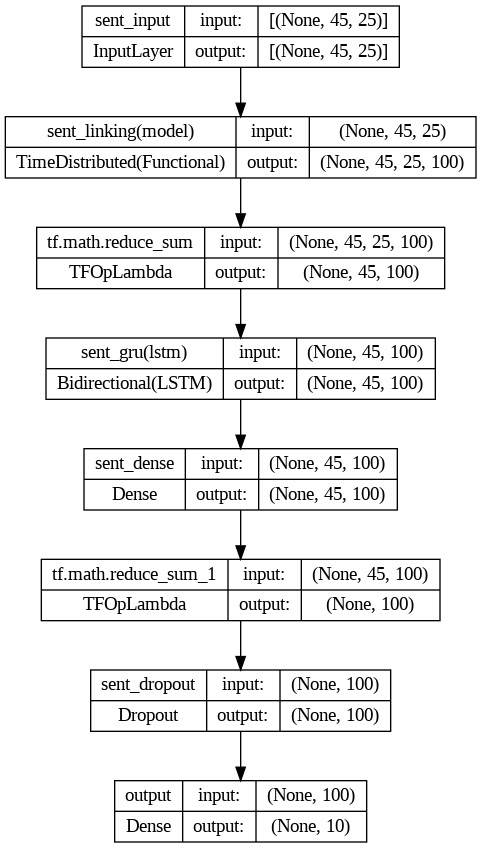

In [ ]:
"""
Creating a Keras functional model for hierarchical network utilizing embeddings, GRUs and dense layers
"""
import tensorflow as tf
embedding_layer = Embedding(len(word_index) + 1,EMBED_SIZE,weights=[embedding_matrix_vocab],
                            input_length=MAX_WORD_NUM, trainable=False,name='word_embedding')

# Words level attention model
word_input = Input(shape=(MAX_WORD_NUM,), dtype='int32',name='word_input')
word_sequences = embedding_layer(word_input)
wordseq=Model(inputs = word_input,outputs = word_sequences)

# Sentence level attention model
sent_input = Input(shape=(MAX_SENTENCE_NUM,MAX_WORD_NUM), dtype='int32',name='sent_input')
sent_encoder = TimeDistributed(wordseq,name='sent_linking')(sent_input)
sent_gru = Bidirectional(LSTM(50, return_sequences=True),name='sent_gru')(tf.reduce_sum(sent_encoder,2))
sent_dense = Dense(100, activation='relu', name='sent_dense')(sent_gru)
sent_drop = Dropout(0.5,name='sent_dropout')(tf.reduce_sum(sent_dense,1))
preds = Dense(10, activation='softmax',name='output')(sent_drop)

# Model compile
model_pre = Model(sent_input, preds)
model_pre.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
print(model_pre.summary())

plot_model(model_pre, to_file='model.png',show_shapes=True)


Epoch 1/20
329/330 [============================>.] - ETA: 0s - loss: 1.9721 - acc: 0.4250
Epoch 1: val_acc improved from -inf to 0.47570, saving model to ham.h5
330/330 [==============================] - 31s 79ms/step - loss: 1.9714 - acc: 0.4252 - val_loss: 1.4776 - val_acc: 0.4757
Epoch 2/20
329/330 [============================>.] - ETA: 0s - loss: 1.4657 - acc: 0.5023
Epoch 2: val_acc improved from 0.47570 to 0.52284, saving model to ham.h5
330/330 [==============================] - 30s 90ms/step - loss: 1.4657 - acc: 0.5023 - val_loss: 1.3778 - val_acc: 0.5228
Epoch 3/20
330/330 [==============================] - ETA: 0s - loss: 1.3929 - acc: 0.5238
Epoch 3: val_acc did not improve from 0.52284
330/330 [==============================] - 24s 73ms/step - loss: 1.3929 - acc: 0.5238 - val_loss: 1.3443 - val_acc: 0.5228
Epoch 4/20
329/330 [============================>.] - ETA: 0s - loss: 1.3521 - acc: 0.5424
Epoch 4: val_acc improved from 0.52284 to 0.55879, saving model to ham.h5
33

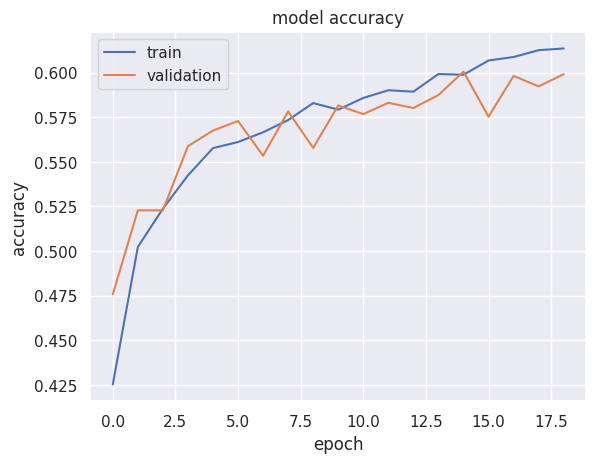

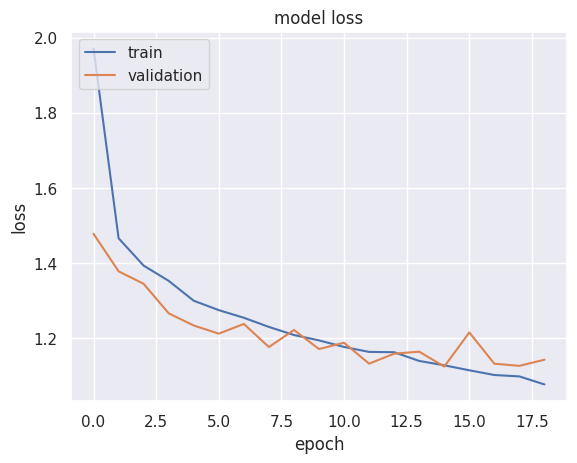

In [ ]:
save_model = keras.callbacks.ModelCheckpoint(filepath='ham.h5',
  monitor='val_acc',
  mode='max',
  save_weights_only=True,
  save_best_only=True,
  verbose=1
)

es = keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=4)

callbacks = [save_model,es]
history = model_pre.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=50,callbacks=callbacks)

print(history.history.keys())
# Plot of accuracy in each epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Plot of loss in each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
loss, acc = model_pre.evaluate(x_test,y_test)
print("Test set accuracy: ",acc)
print("Test set loss: ", loss)

65/65 [==============================] - 1s 21ms/step - loss: 1.1307 - acc: 0.5949
Test set accuracy:  0.5949490070343018
Test set loss:  1.130743145942688


In [ ]:
classes_pred=[]
r=model_pre.predict(x_test)
for i in r:
  classes_pred.append(np.argmax(i))

65/65 [==============================] - 3s 21ms/step


In [ ]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

#### In the below implementation , for each of the sentences in each of the documents, it is passed using a time distributed layer which encompasses of an embedding layer and then a Bidirn LSTM which returns hidden states taking each word into account and then its passed through a dense layer in order to attain a 100 dimn output follwed by attention layer which returns the coefficients as well as context vector for every sentence represented by words, and hence 40(num_sentences)"*"100(embed_dim) dimensions for every document

#### Later this 40"*"100 dimn document representation is passed through a bidirectional LSTM Layer followed by a 100 dim Dense layer followed by Attention Layer which gives weights to each of the sentences in the document alongside the context vector(a 1"*"100 dimn representation). This is followed as usual by Dropout Layer and a  10 dimn Dense layer which finds its place in output.

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 word_input (InputLayer)     [(None, 25)]              0         
                                                                 
 word_embedding (Embedding)  (None, 25, 100)           13292400  
                                                                 
 word_gru (Bidirectional)    (None, 25, 100)           60400     
                                                                 
 word_dense (Dense)          (None, 25, 100)           10100     
                                                                 
 word_attention (AttentionL  [(None, 100),             10200     
 ayer)                        (None, 25, 1)]                     
                                                                 
Total params: 13373100 (51.01 MB)
Trainable params: 80700 (315.23 KB)
Non-trainable params: 13292400 (50.71 MB)
_____________

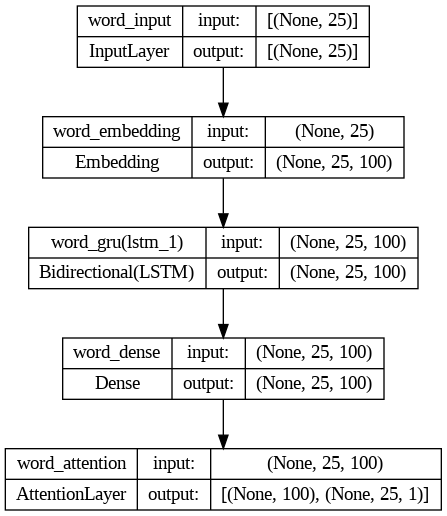

In [ ]:
"""
Creating a Keras functional model for hierarchical attention network
"""
embedding_layer = Embedding(len(word_index) + 1,EMBED_SIZE,weights=[embedding_matrix_vocab],
                            input_length=MAX_WORD_NUM, trainable=False,name='word_embedding')

# Words level attention model
word_input = Input(shape=(MAX_WORD_NUM,), dtype='int32',name='word_input')
word_sequences = embedding_layer(word_input)
word_gru = Bidirectional(LSTM(50, return_sequences=True),name='word_gru')(word_sequences)
word_dense = Dense(100, activation='relu', name='word_dense')(word_gru)
word_att,word_coeffs = AttentionLayer(EMBED_SIZE,True,name='word_attention')(word_dense)
wordEncoder = Model(inputs = word_input,outputs = word_att)
wordcoef=Model(inputs = word_input,outputs = word_coeffs)
wordseq=Model(inputs = word_input,outputs = word_sequences)
wordgru=Model(inputs = word_input,outputs = word_gru)
worddense=Model(inputs = word_input,outputs = word_dense)

# Sentence level attention model
sent_input = Input(shape=(MAX_SENTENCE_NUM,MAX_WORD_NUM), dtype='int32',name='sent_input')
sent_encoder = TimeDistributed(wordEncoder,name='sent_linking')(sent_input)
sent_gru = Bidirectional(LSTM(50, return_sequences=True),name='sent_gru')(sent_encoder)
sent_dense = Dense(100, activation='relu', name='sent_dense')(sent_gru)
sent_att,sent_coeffs = AttentionLayer(EMBED_SIZE,return_coefficients=True,name='sent_attention')(sent_dense)
sent_drop = Dropout(0.5,name='sent_dropout')(sent_att)
preds = Dense(10, activation='softmax',name='output')(sent_drop)

# Model compile
# sentgru= Model(inputs = sent_input,outputs = sent_gru)
# sentatt= Model(inputs = sent_input,outputs = sent_att)
# sentcoef= Model(inputs = sent_input,outputs = sent_coeffs)
model_att = Model(sent_input, preds)
model_att.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
print(wordEncoder.summary())
print(model_att.summary())

plot_model(model_att, to_file='model.png',show_shapes=True)
plot_model(wordEncoder, to_file='wordEncoder.png',show_shapes=True)

Epoch 1/8
330/330 [==============================] - ETA: 0s - loss: 1.6452 - acc: 0.4143
Epoch 1: val_acc improved from -inf to 0.48008, saving model to ham.h5
330/330 [==============================] - 381s 1s/step - loss: 1.6452 - acc: 0.4143 - val_loss: 1.4543 - val_acc: 0.4801
Epoch 2/8
330/330 [==============================] - ETA: 0s - loss: 1.3645 - acc: 0.5430
Epoch 2: val_acc improved from 0.48008 to 0.55053, saving model to ham.h5
330/330 [==============================] - 348s 1s/step - loss: 1.3645 - acc: 0.5430 - val_loss: 1.2753 - val_acc: 0.5505
Epoch 3/8
330/330 [==============================] - ETA: 0s - loss: 1.1770 - acc: 0.6053
Epoch 3: val_acc improved from 0.55053 to 0.61710, saving model to ham.h5
330/330 [==============================] - 358s 1s/step - loss: 1.1770 - acc: 0.6053 - val_loss: 1.0751 - val_acc: 0.6171
Epoch 4/8
330/330 [==============================] - ETA: 0s - loss: 1.0645 - acc: 0.6383
Epoch 4: val_acc improved from 0.61710 to 0.64140, savi

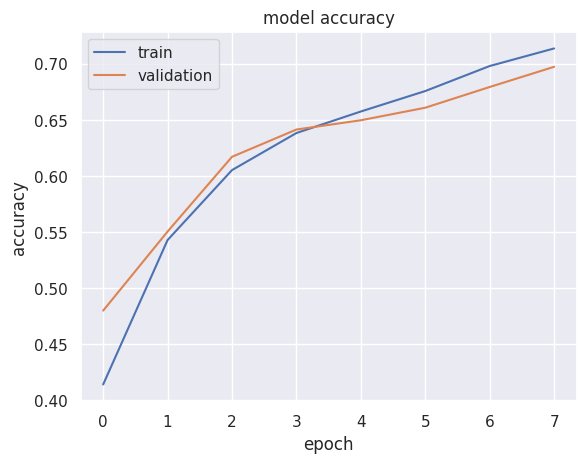

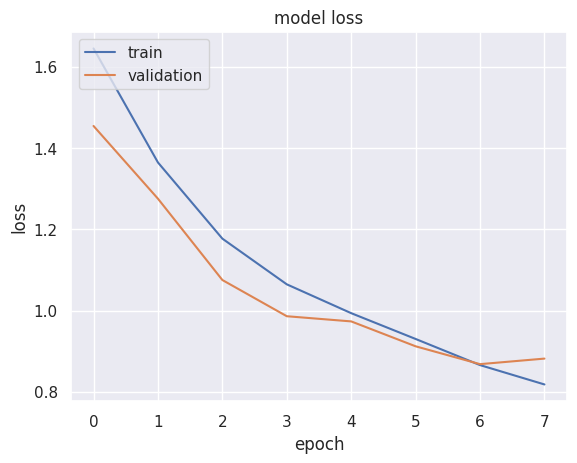

In [ ]:
## Incorporating early stopping while model training
save_model = keras.callbacks.ModelCheckpoint(filepath='ham.h5',
  monitor='val_acc',
  mode='max',
  save_weights_only=True,
  save_best_only=True,
  verbose=1
)

es = keras.callbacks.EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=4)

callbacks = [save_model,es]
history = model_att.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=8, batch_size=50,callbacks=callbacks)

print(history.history.keys())
# Plot of accuracy in each epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Plot of loss in each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
history = model_att.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=8, batch_size=50,callbacks=callbacks)

print(history.history.keys())
# Plot of accuracy in each epoch
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# Plot of loss in each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Epoch 1/5
330/330 [==============================] - ETA: 0s - loss: 0.7758 - acc: 0.7304
Epoch 1: val_acc did not improve from 0.70165
330/330 [==============================] - 347s 1s/step - loss: 0.7758 - acc: 0.7304 - val_loss: 0.8545 - val_acc: 0.6983
Epoch 2/5
330/330 [==============================] - ETA: 0s - loss: 0.7292 - acc: 0.7433
Epoch 2: val_acc improved from 0.70165 to 0.71380, saving model to ham.h5
330/330 [==============================] - 347s 1s/step - loss: 0.7292 - acc: 0.7433 - val_loss: 0.8273 - val_acc: 0.7138
Epoch 3/5
330/330 [==============================] - ETA: 0s - loss: 0.6894 - acc: 0.7563
Epoch 3: val_acc did not improve from 0.71380
330/330 [==============================] - 343s 1s/step - loss: 0.6894 - acc: 0.7563 - val_loss: 0.8330 - val_acc: 0.7114
Epoch 4/5
188/330 [================>.............] - ETA: 2:17 - loss: 0.6575 - acc: 0.7649

In [ ]:
loss, acc = model_att.evaluate(x_test,y_test)
print("Test set accuracy: ",acc)
print("Test set loss: ", loss)

65/65 [==============================] - 15s 223ms/step - loss: 0.8918 - acc: 0.6877
Test set accuracy:  0.6877124905586243
Test set loss:  0.8918401598930359


In [ ]:
model_att.save('Model_7epoch.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Summaries of Every News Article

In [ ]:
### creating an input array in a similar way as what our training data was
input_array=[]
for i in range(df['tokenized_text'].shape[0]):
    sequence = wordToSeq(df['tokenized_text'].iloc[i],word_index,MAX_SENTENCE_NUM,MAX_WORD_NUM,MAX_FEATURES)
    input_array.append(sequence)

In [ ]:
input_array[0]

array([[55361,   181,    26, ...,     0,     0,     0],
       [    3,    82,   198, ...,     0,     0,     0],
       [25050,  2403, 33418, ...,     0,     0,     0],
       ...,
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0]], dtype=int32)

In [ ]:
len(input_array)

20586

In [ ]:
sent_input[0]

In [ ]:
df.head()

#### We intend to find top 4 sentences that represent every document and hence we are utilizing the learnt attention weights for the same. If a document has less than 4 sentences, we return every sentence of it.

In [ ]:
sent_att_weights = Model(inputs=sent_input,outputs=sent_coeffs)
summary_txt=[]
cnt=0
output_array = sent_att_weights.predict(np.resize(input_array,(len(input_array),MAX_SENTENCE_NUM,MAX_WORD_NUM)))
for i in range(len(output_array)):
  # Get n sentences with most attention in document
  n_sentences = 4
  sent_index = output_array[i].flatten().argsort()[-n_sentences:]
  sent_index = np.sort(sent_index)
  sent_index = sent_index.tolist()
  # Create summary using n sentences
  sent_list = tokenize.sent_tokenize(df['content'][i])
  try:
    summary = [sent_list[i] for i in sent_index]
    summary_txt.append(summary)
  except:
    print(sent_index)
    print(len(sent_list))
    cnt+=1
    summary_txt.append(sent_list)

644/644 [==============================] - 151s 229ms/step
[0, 9, 43, 44]
14
[9, 11, 43, 44]
13
[4, 5, 6, 44]
7
[9, 42, 43, 44]
14
[1, 2, 3, 44]
6
[3, 4, 43, 44]
19
[3, 42, 43, 44]
26
[0, 1, 2, 3]
3
[6, 7, 43, 44]
13
[3, 42, 43, 44]
6
[10, 42, 43, 44]
14
[0, 1, 2, 3]
3
[5, 6, 7, 44]
16
[41, 42, 43, 44]
17
[6, 7, 8, 44]
22
[0, 5, 6, 44]
7
[3, 42, 43, 44]
17
[41, 42, 43, 44]
8
[6, 42, 43, 44]
11
[7, 8, 43, 44]
12
[2, 3, 43, 44]
5
[3, 4, 43, 44]
9
[4, 42, 43, 44]
7
[12, 13, 43, 44]
20
[2, 3, 43, 44]
9
[5, 42, 43, 44]
13
[6, 7, 8, 44]
15
[7, 42, 43, 44]
28
[8, 42, 43, 44]
10
[0, 1, 4, 5]
4
[41, 42, 43, 44]
16
[41, 42, 43, 44]
13
[41, 42, 43, 44]
29
[9, 42, 43, 44]
11
[0, 1, 2, 3]
1
[13, 14, 15, 44]
19
[0, 1, 2, 3]
2
[0, 1, 2, 3]
3
[41, 42, 43, 44]
9
[5, 6, 43, 44]
30
[5, 15, 16, 44]
23
[0, 1, 2, 3]
3
[0, 1, 2, 44]
19
[41, 42, 43, 44]
12
[2, 3, 4, 44]
16
[41, 42, 43, 44]
7
[3, 4, 5, 44]
15
[2, 3, 43, 44]
4
[4, 5, 43, 44]
20
[4, 42, 43, 44]
8
[0, 1, 2, 3]
2
[0, 4, 5, 44]
12
[4, 5, 6, 44]
11


In [ ]:
print(cnt)

273


In [ ]:
df['summary_article']=summary_txt
df.head()

,datetime,title,content,category,url,upd_category,reformed_text,tokenized_text,Code,summary_article
0,2022-01-01 01:42:00,Nieuwjaarsstunt: Legobeeld André Hazes duikt ...,Het Legobeeld van André Hazes dat begin deze ...,Binnenland,https://nos.nl/artikel/2411502-nieuwjaarsstunt...,Binnenland,het legobeeld van andré hazes dat begin deze ...,legobeellen Andre Hazes begin week vast plek D...,0,[Het Legobeeld van André Hazes dat begin deze...
1,2022-01-01 02:07:00,Politie stuurt duizenden feestvierders weg van...,Duizenden mensen hebben de jaarwisseling gevie...,Binnenland,https://nos.nl/artikel/2411505-politie-stuurt-...,Binnenland,duizenden mensen hebben de jaarwisseling gevie...,duizend mens jaarwisseling vieren Dam Amsterda...,0,[Duizenden mensen hebben de jaarwisseling gevi...
2,2022-01-01 05:25:00,"ME op meerdere plekken in actie, brandweer en ...",Op meerdere plekken in het land is in de Nieuw...,Binnenland,https://nos.nl/artikel/2411511-me-op-meerdere-...,Binnenland,op meerdere plekken in het land is in de nieuw...,meerdere plek land nieuwjaarsnacht mobiel eenh...,0,[Op meerdere plekken in het land is in de Nieu...
3,2022-01-01 07:43:00,"Laatste Golden Girl overleden, alleen Redford ...","Betty White, de laatste nog overgebleven Golde...",Cultuur & Media,https://nos.nl/artikel/2411512-laatste-golden-...,Cultuur & Media,"betty white, de laatste nog overgebleven golde...",betty white laat overgebleven golden girl over...,2,"[De in 1922 in Oak Park, Illinois geboren actr..."
4,2022-01-01 07:55:00,"Twintig jaar euro, maar gebruik daalt (vooral ...",De eurobiljetten zijn vandaag twintig jaar oud...,Economie,https://nos.nl/artikel/2411513-twintig-jaar-eu...,Economie,de eurobiljetten zijn vandaag twintig jaar oud...,eurobiljet vandaag twintig jaar oud . 1 januar...,3,"[Uit elk land zit er één expert bij, voor Ne..."


In [ ]:
len(df)

20586

In [ ]:
print(df['content'].values[20000])

Oekraïne heeft de strategie aangepast van het tegenoffensief in het zuiden en oosten van het land. Volgens militair analisten richt het leger zich nu met name op het uitputten van de Russische troepen in plaats van een grote, geconcentreerde aanval op één plek langs het front. De strategie is terug te zien in herhaaldelijke aanvallen, ver achter de frontlinies. De plannen zijn noodgedwongen aangepast vanwege de grote verliezen aan het begin van het tegenoffensief, dat begin juni van start ging. "In de eerste weken trokken de troepen naar voren, maar dat ging gepaard met grote verliezen", zegt veiligheidsdeskundige Maria Avdeeva van de Oekraïense European Expert Association. Volgens The New York Times raakte zo'n 20 procent van de ingezette wapens beschadigd of vernietigd, waaronder westerse tanks en pantservoertuigen. Daartegenover stond vrij beperkte terreinwinst: zo'n 300 vierkante kilometer. Deze gebieden heeft Oekraïne in de afgelopen anderhalve maand bevrijd: Oekraïne operee

In [ ]:
print(df['summary_article'].values[20000])

['Oekraïne heeft de strategie aangepast van het tegenoffensief in het zuiden en oosten van het land.', '"In de eerste weken trokken de troepen naar voren, maar dat ging gepaard met grote verliezen", zegt veiligheidsdeskundige Maria Avdeeva van de Oekraïense European Expert Association.', 'Deze gebieden heeft Oekraïne in de afgelopen anderhalve maand bevrijd: Oekraïne opereert voorzichtiger dan Rusland, ziet brigadegeneraal Han Bouwmeester, hoogleraar militair-operationele wetenschappen bij de Nederlandse Defensie Academie.', 'In de eerste weken van het tegenoffensief hebben de Oekraïense strijdkrachten gezocht naar zwakke punten in de verdediging, maar die lijken er niet te zijn; de linies blijken sterk voor het Oekraïense leger, dat geen luchtoverwicht heeft en kampt met een dreigend munitietekort.']


In [ ]:
word_context = wordEncoder.get_layer('word_attention').get_weights()
len(word_context[0][1])

100